In [1]:
from tkinter import messagebox
from tkinter import *
from tkinter import simpledialog
import tkinter
from tkinter import filedialog
from imutils import paths
from tkinter.filedialog import askopenfilename
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plot
import seaborn as sns

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
# seperation of training and testing data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
main = tkinter.Tk()
main.title("Rainfall Prediction")
main.geometry("1300x1200")

''

In [4]:
def upload():
    global filename
    text.delete('1.0', END)
    filename = askopenfilename(initialdir = "Dataset")
    pathlabel.config(text=filename)
    text.insert(END,"Dataset loaded\n\n")

In [5]:
def csv():
    global df
    text.delete('1.0', END)
    df=pd.read_csv(filename)
    text.insert(END,"Top Five rows of dataset\n"+str(df.head())+"\n")
    text.insert(END,"Last Five rows of dataset\n"+str(df.tail())+"\n")
    text.insert(END,"Data columns information: \n"+str(df.columns)+"\n")
    text.insert(END,"Data Shape information: \n"+str(df.shape)+"\n")
    fig = plot.figure(figsize=(10, 5))
    ax1 = sns.boxplot(data=df[df.columns[2:14]])
    ax1.set_title("Rainfall in Months")
    plot.xlabel("Months",size='18')
    plot.ylabel("Rainfall (mm)",size='18')
    #plot.show()
    fig1 = plot.figure(figsize=(10, 5))
    ax2 = sns.boxplot(data=df[df.columns[15:19]])
    ax2.set_title("Rainfall in Comulative Months")
    plot.xlabel("Comulative Months",size='18')
    plot.ylabel("Rainfall (mm)",size='18')
    #plot.show()
    df.hist(figsize=(10,10));
    plot.show()

In [6]:
def preprocess():
    global df
    global X_train, X_test, y_train, y_test
    df.groupby("YEAR").sum()['ANNUAL'].plot(figsize=(12,8));
    df[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
        'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().plot(figsize=(13,8));
    df[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
        'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").mean().plot.barh(stacked=True,figsize=(13,8));
    df.isna().sum()
    df.fillna(method='ffill',inplace=True)
    division_data = np.asarray(df[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])
    X = None; y = None
    for i in range(division_data.shape[1]-3):
        if X is None:
            X = division_data[:, i:i+3]
            y = division_data[:, i+3]
        else:
            X = np.concatenate((X, division_data[:, i:i+3]), axis=0)
            y = np.concatenate((y, division_data[:, i+3]), axis=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    text.insert(END,"Train Shape information: \n"+str(X_train.shape)+"\n")
    text.insert(END,"Test Shape information: \n"+str(X_test.shape)+"\n")
    plot.show()

In [7]:
def linearmodels():
    global X_train, X_test, y_train, y_test
    global en_mae,lasso_mae,ridge_mae,lars_mae
    # linear model
    enreg = linear_model.ElasticNet(alpha=0.5)
    enreg.fit(X_train, y_train)
    y_pred = enreg.predict(X_test)
    en_mae = mean_absolute_error(y_test, y_pred)
    text.insert(END,"MAE value for Elastic Net: "+str(en_mae)+"\n")
    
    # linear model
    lassoreg = linear_model.Lasso(alpha=0.9)
    lassoreg.fit(X_train, y_train)
    y_pred = lassoreg.predict(X_test)
    lasso_mae = mean_absolute_error(y_test, y_pred)
    text.insert(END,"MAE value for Lasso: "+str(lasso_mae)+"\n")

    # linear model
    ridgereg = linear_model.Ridge(alpha=0.01)
    ridgereg.fit(X_train, y_train)
    y_pred = ridgereg.predict(X_test)
    ridge_mae = mean_absolute_error(y_test, y_pred)
    text.insert(END,"MAE value for Ridge: "+str(ridge_mae)+"\n")

    # linear model
    larsreg = linear_model.LassoLars(alpha=0.1)
    larsreg.fit(X_train, y_train)
    y_pred = larsreg.predict(X_test)
    lars_mae = mean_absolute_error(y_test, y_pred)
    text.insert(END,"MAE value for LassoLars: "+str(lars_mae)+"\n")

In [8]:
def others():
    global X_train, X_test, y_train, y_test
    global dt_mae,rf_mae,gb_mae
    dtreg = DecisionTreeRegressor(random_state=0)
    dtreg.fit(X_train, y_train)
    y_pred = dtreg.predict(X_test)
    dt_mae = mean_absolute_error(y_test, y_pred)
    text.insert(END,"MAE value for Lasso: "+str(dt_mae)+"\n") 
    rfreg = RandomForestRegressor(random_state=0)
    rfreg.fit(X_train, y_train)
    y_pred = rfreg.predict(X_test)
    rf_mae = mean_absolute_error(y_test, y_pred)
    text.insert(END,"MAE value for Decisiontree: "+str(rf_mae)+"\n")
    gbreg = GradientBoostingRegressor(random_state=0)
    gbreg.fit(X_train, y_train)
    y_pred = gbreg.predict(X_test)
    gb_mae = mean_absolute_error(y_test, y_pred)
    text.insert(END,"MAE value for GradientBoosting: "+str(gb_mae)+"\n")

In [9]:
def graph():
    global dt_mae,rf_mae,gb_mae,en_mae,lasso_mae,ridge_mae,lars_mae
    mae=[en_mae,lasso_mae,ridge_mae,lars_mae,dt_mae,rf_mae,gb_mae]
    bars=['Elastic','Lasso','Ridge','LARS','DT','RF','GB']
    print(bars,len(bars))
    y_pos = np.arange(len(bars))
    plot.bar(y_pos, mae)
    plot.xticks(y_pos, bars)
    plot.show()   
    

In [10]:
font = ('times', 16, 'bold')
title = Label(main, text='Performance Analysis and Evaluation of Machine Learning Algorithms in Rainfall Prediction')
title.config(bg='sky blue', fg='black')  
title.config(font=font)           
title.config(height=3, width=120)       
title.place(x=0,y=5)

In [11]:
font1 = ('times', 14, 'bold')
upload = Button(main, text="Upload Dataset", command=upload)
upload.place(x=700,y=100)
upload.config(font=font1)

In [12]:
pathlabel = Label(main)
pathlabel.config(bg='dark orchid', fg='white')  
pathlabel.config(font=font1)
pathlabel.place(x=700,y=150)

In [13]:
df = Button(main, text="Reading Data ", command=csv)
df.place(x=700,y=200)
df.config(font=font1)

In [14]:
split = Button(main, text="Preprocess and Split ", command=preprocess)
split.place(x=700,y=250)
split.config(font=font1)

In [15]:
ml= Button(main, text="Run Linear Models", command=linearmodels)
ml.place(x=700,y=300)
ml.config(font=font1)

In [16]:
ml= Button(main, text="Run ML Models", command=others)
ml.place(x=700,y=350)
ml.config(font=font1) 

In [17]:
graph= Button(main, text="Model Comparison", command=graph)
graph.place(x=700,y=400)
graph.config(font=font1)

In [18]:
font1 = ('times', 12, 'bold')
text=Text(main,height=30,width=80)
scroll=Scrollbar(text)
text.configure(yscrollcommand=scroll.set)
text.place(x=10,y=100)
text.config(font=font1)

2023-06-20 01:46:03.051 python[92556:1342660] +[CATransaction synchronize] called within transaction


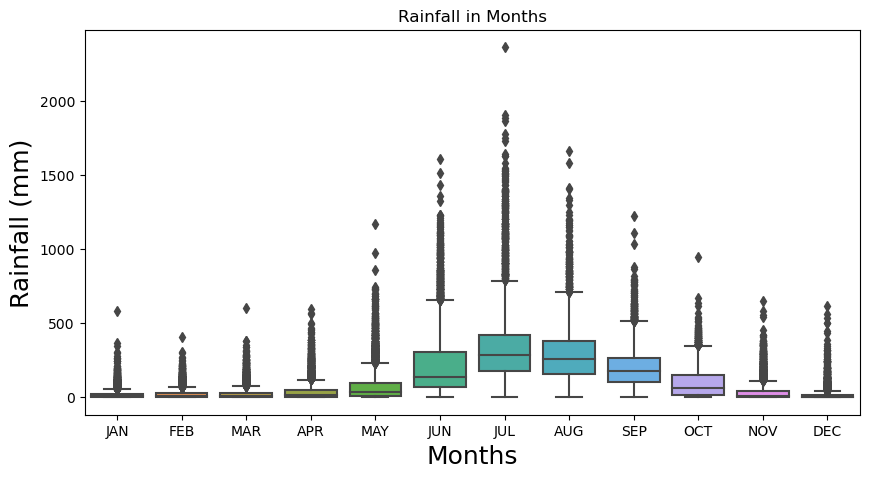

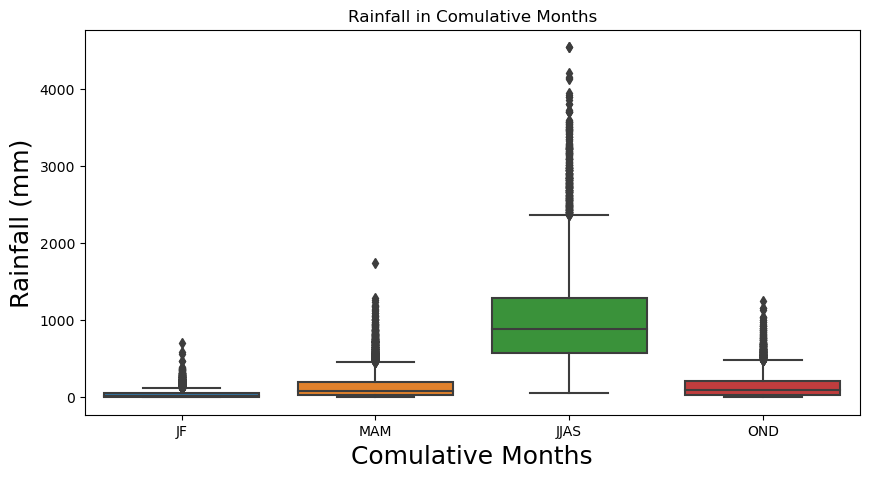

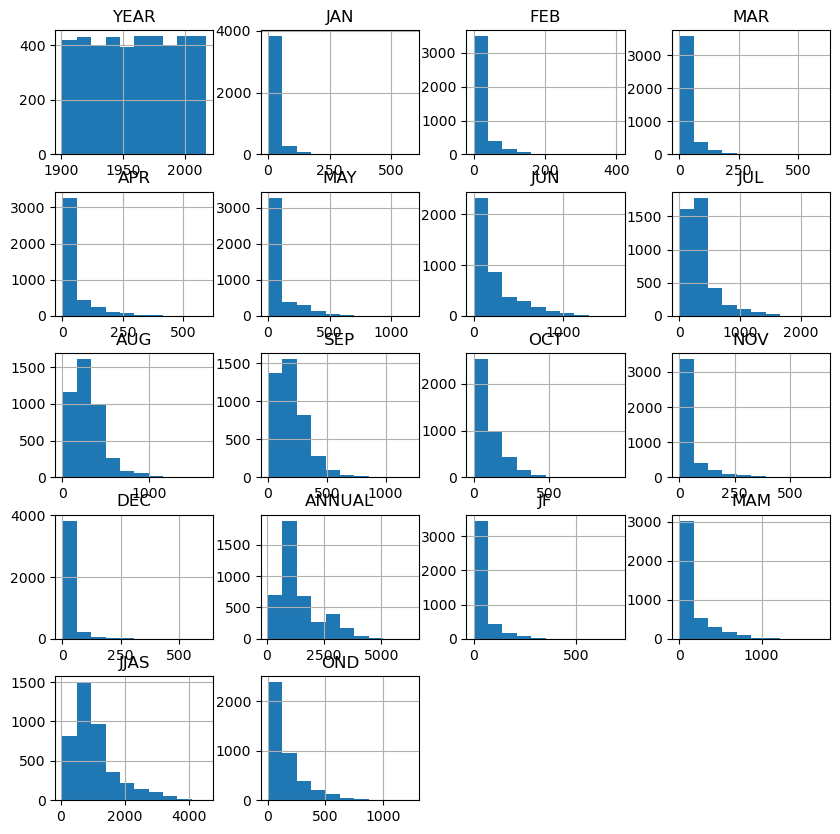

/var/folders/1s/_w62b4b16zq1zsv5ls_ghk_c0000gn/T/ipykernel_92556/1081419903.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("YEAR").sum()['ANNUAL'].plot(figsize=(12,8));


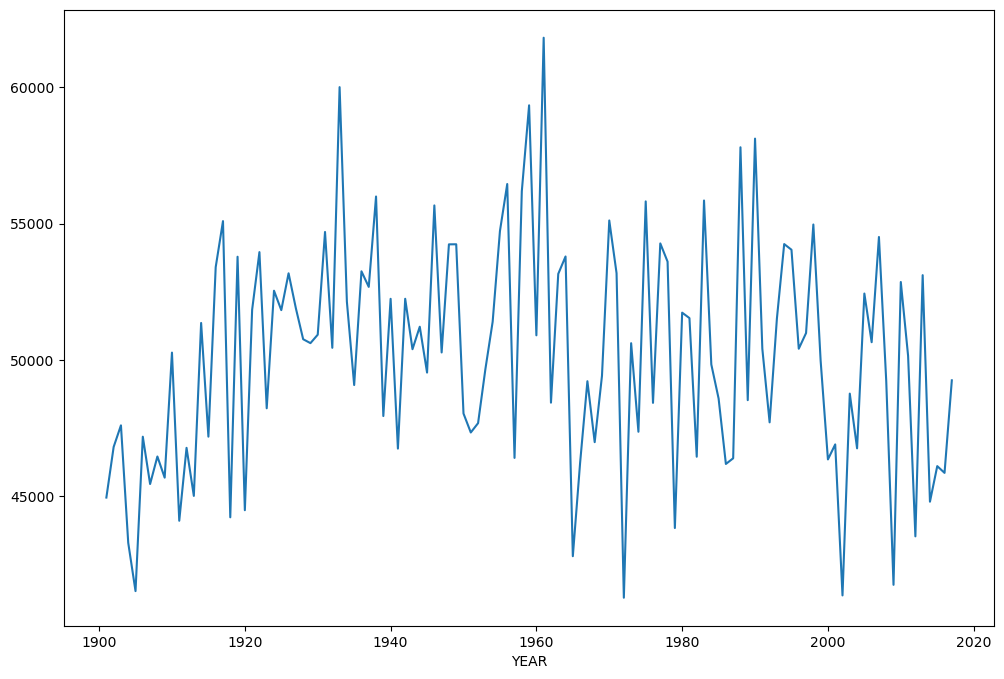

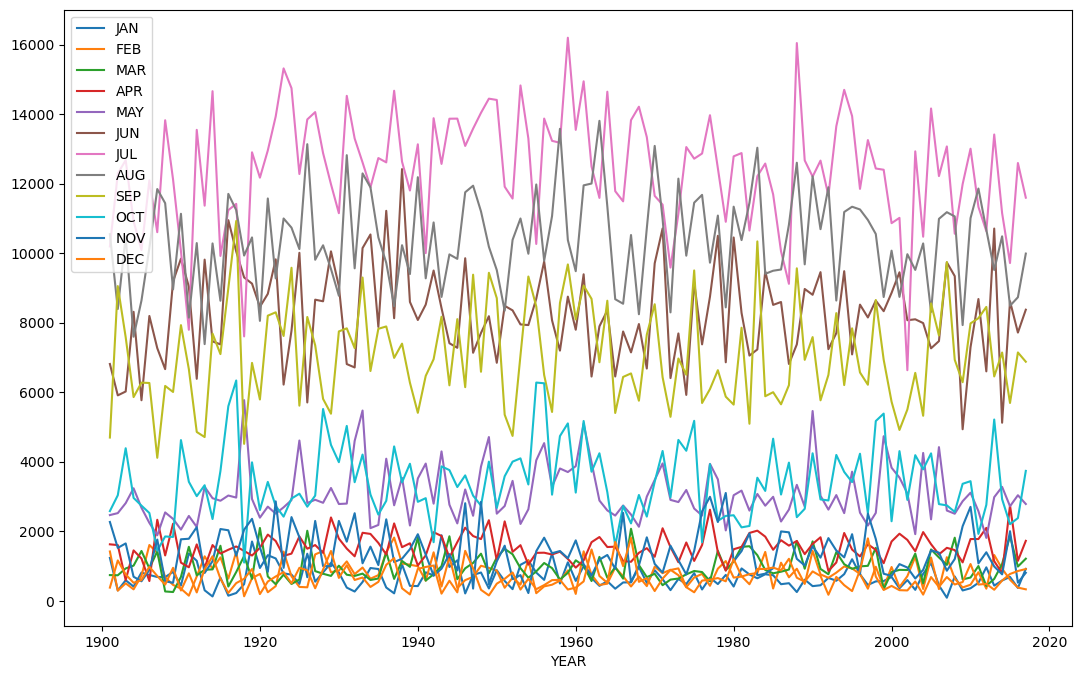

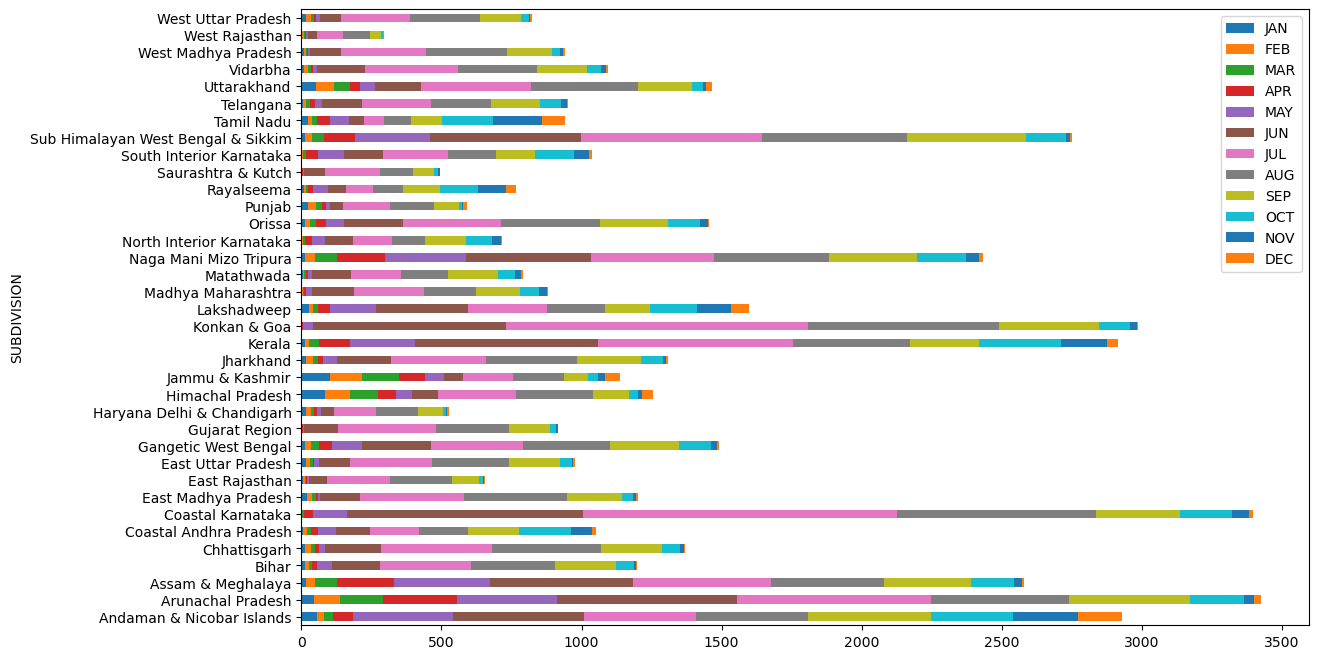

/var/folders/1s/_w62b4b16zq1zsv5ls_ghk_c0000gn/T/ipykernel_92556/1081419903.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("YEAR").sum()['ANNUAL'].plot(figsize=(12,8));


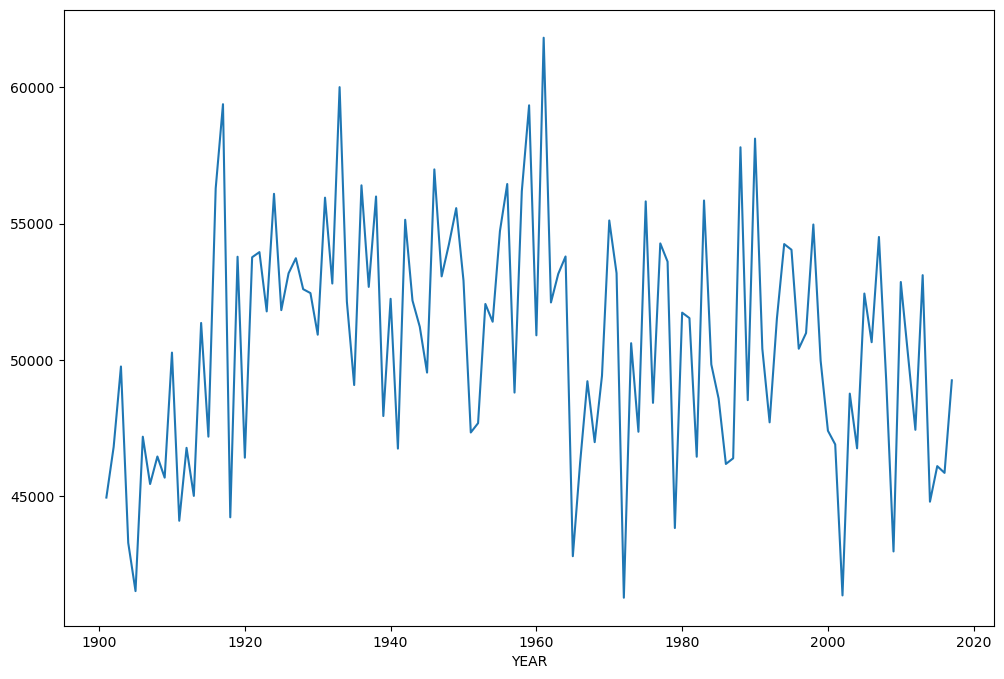

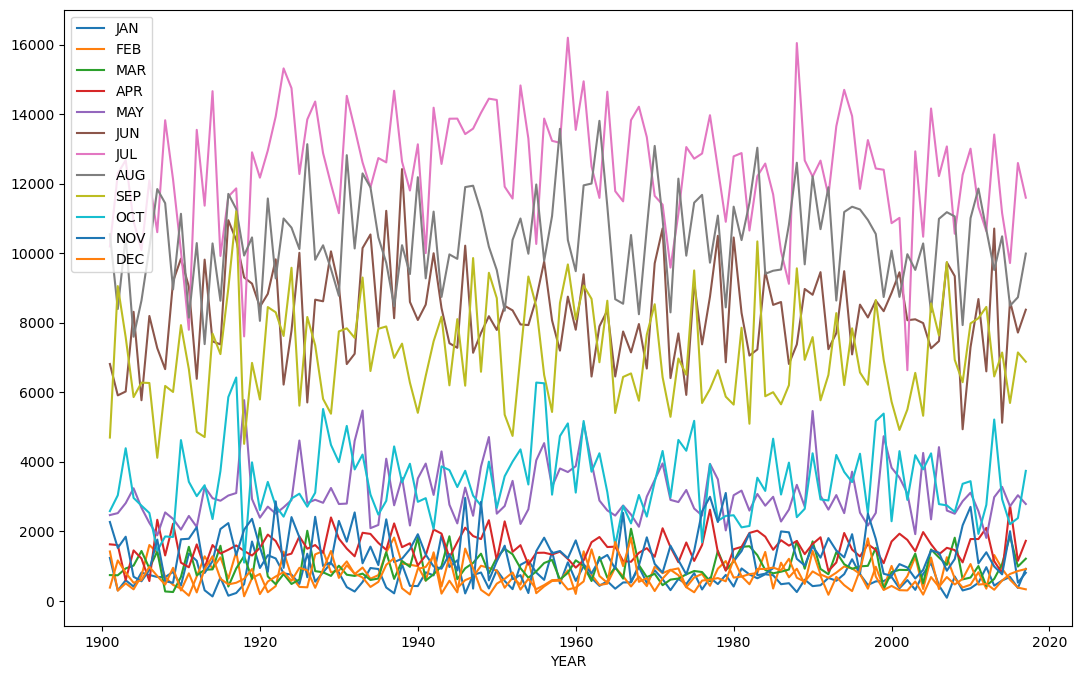

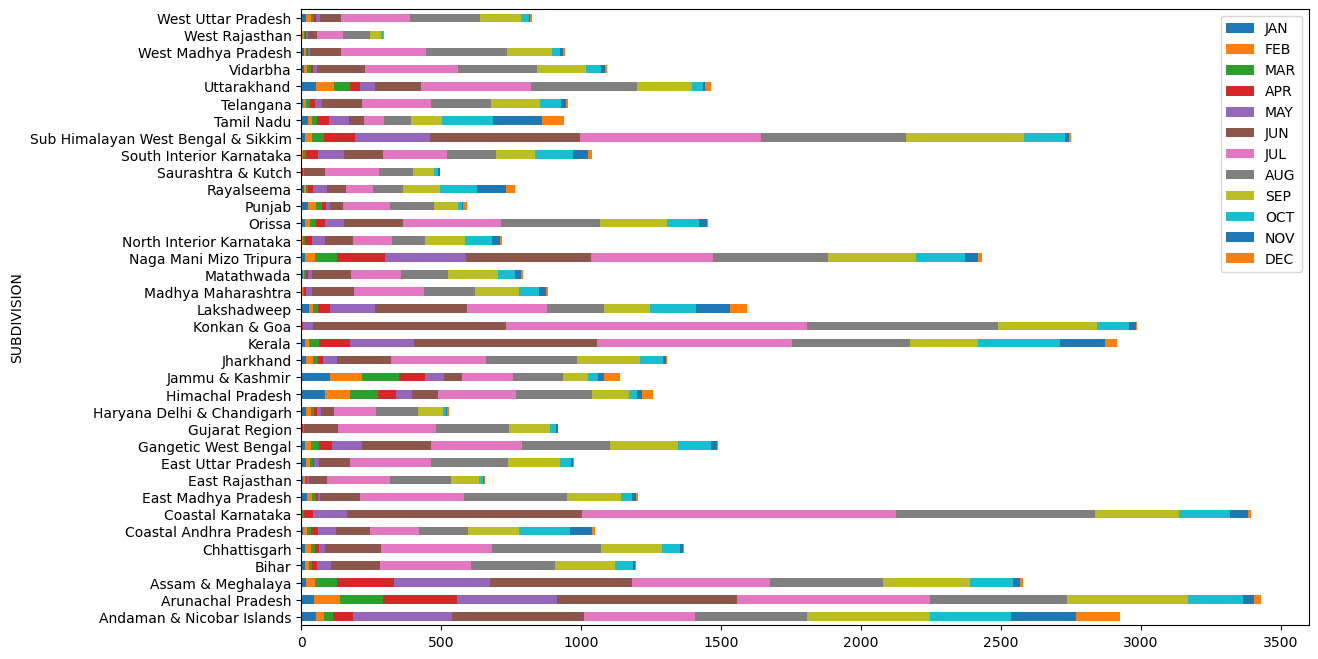

['Elastic', 'Lasso', 'Ridge', 'LARS', 'DT', 'RF', 'GB'] 7


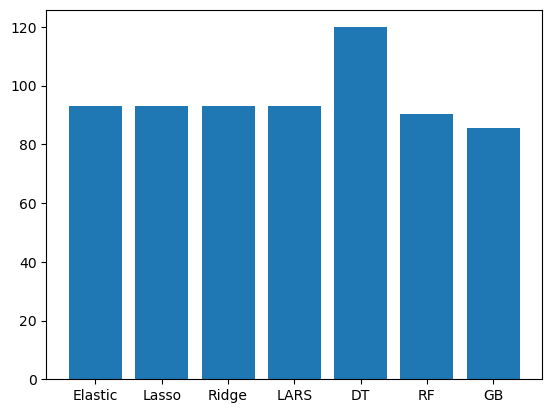

['Elastic', 'Lasso', 'Ridge', 'LARS', 'DT', 'RF', 'GB'] 7


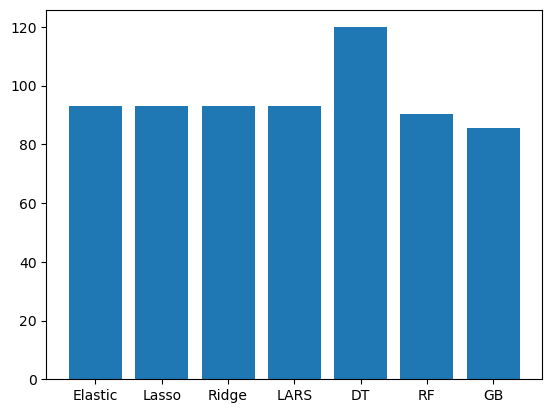

In [ ]:
main.config(bg='steel blue')
main.mainloop()